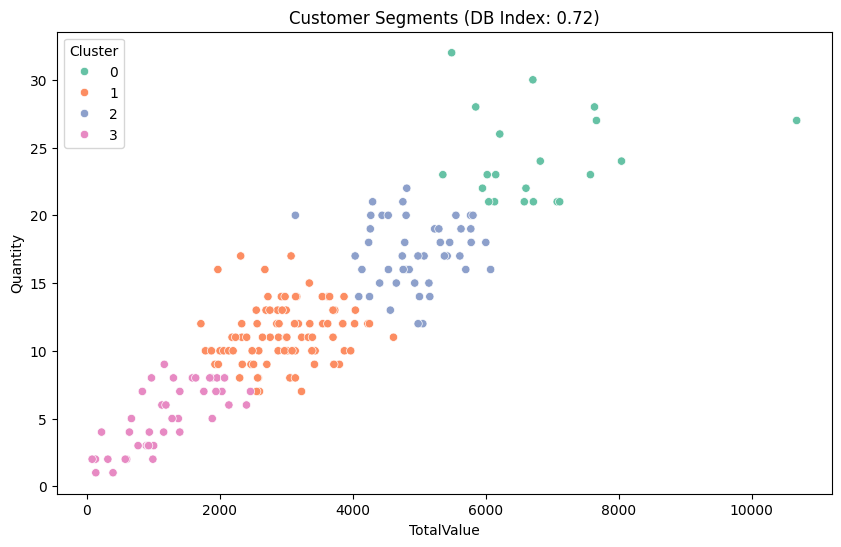

In [3]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import davies_bouldin_score
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

customer_transactions = merged_df.groupby('CustomerID').agg({
    'TotalValue': 'sum',
    'Quantity': 'sum'
}).reset_index()

scaler = StandardScaler()
scaled_data = scaler.fit_transform(customer_transactions[['TotalValue', 'Quantity']])

kmeans = KMeans(n_clusters=4, random_state=42)
customer_transactions['Cluster'] = kmeans.fit_predict(scaled_data)

db_index = davies_bouldin_score(scaled_data, customer_transactions['Cluster'])

plt.figure(figsize=(10, 6))
sns.scatterplot(x=customer_transactions['TotalValue'], y=customer_transactions['Quantity'], hue=customer_transactions['Cluster'], palette='Set2')
plt.title(f'Customer Segments (DB Index: {db_index:.2f})')
plt.show()

customer_transactions[['CustomerID', 'Cluster']].to_csv('/content/Clustering.csv', index=False)
